In [3]:
import pandas as pd
import numpy as np
import math
import json
import os
import matplotlib. pyplot as plt
import seaborn as sns
% matplotlib inline

# read in the json file
transcript = pd.read_json(open("transcript.json", "r", encoding="utf8"), orient='records', lines=True)
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)

Taking samples from the dataset to see what i'm dealing with exactly.

In [4]:
portfolio.sample(5)

,reward,channels,difficulty,duration,offer_type,id
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837


In [5]:
transcript.sample(5)

,person,event,value,time
103725,edc7b04392144da9979f3077095f268a,transaction,{'amount': 9.04},288
111013,7561a0a081e64e118bbc78818c890ab7,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},336
210567,7fbdb682e1cb47b8aa05b7d05cd5d3a6,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},504
40666,0cb086ad62d34af1b8a3fc1860e4215f,transaction,{'amount': 0.06},90
29797,81a6b5a34a204d8081676f1cab19a8d8,transaction,{'amount': 2.16},48


In [6]:
profile.sample(5)

,gender,age,id,became_member_on,income
2068,F,68,4ea6530ba3a54fb286b431f959a9527b,20180701,41000.0
16288,F,55,80026cff61554dc7975051cf9f99d8a3,20171215,99000.0
13120,F,100,edbb23d321174301a15049a09df4072b,20170507,71000.0
3396,M,57,061afeca89524537b960b57b0a609533,20160628,67000.0
2453,M,60,15618710293b44e59b72aae0f5827725,20170801,38000.0


In [7]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [8]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [9]:
profile["income"].sort_values().unique()

array([ 30000.,  31000.,  32000.,  33000.,  34000.,  35000.,  36000.,
        37000.,  38000.,  39000.,  40000.,  41000.,  42000.,  43000.,
        44000.,  45000.,  46000.,  47000.,  48000.,  49000.,  50000.,
        51000.,  52000.,  53000.,  54000.,  55000.,  56000.,  57000.,
        58000.,  59000.,  60000.,  61000.,  62000.,  63000.,  64000.,
        65000.,  66000.,  67000.,  68000.,  69000.,  70000.,  71000.,
        72000.,  73000.,  74000.,  75000.,  76000.,  77000.,  78000.,
        79000.,  80000.,  81000.,  82000.,  83000.,  84000.,  85000.,
        86000.,  87000.,  88000.,  89000.,  90000.,  91000.,  92000.,
        93000.,  94000.,  95000.,  96000.,  97000.,  98000.,  99000.,
       100000., 101000., 102000., 103000., 104000., 105000., 106000.,
       107000., 108000., 109000., 110000., 111000., 112000., 113000.,
       114000., 115000., 116000., 117000., 118000., 119000., 120000.,
           nan])

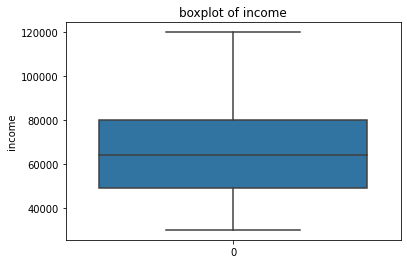

In [10]:
sns.boxplot(data = profile["income"])
plt.title('boxplot of income')
plt.ylabel('income')
plt.show()

In [11]:
profile["age"].sort_values().unique()

array([ 18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 118])

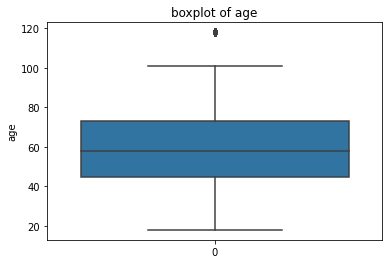

In [12]:
sns.boxplot(data = profile["age"])
plt.title('boxplot of age')
plt.ylabel('age')
plt.show()

In [13]:
profile["became_member_on"].sort_values().unique()

array([20130729, 20130730, 20130731, ..., 20180724, 20180725, 20180726])

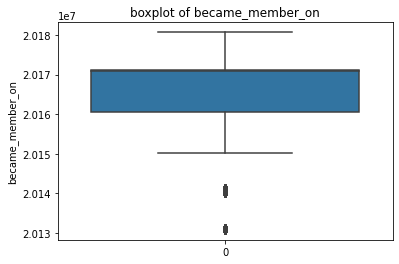

In [14]:
sns.boxplot(data = profile["became_member_on"])
plt.title('boxplot of became_member_on')
plt.ylabel('became_member_on')
plt.show()

checking how the transcript datset looks like to visaulize it later on

# Data Cleaning

In [15]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [16]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [17]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [18]:
# age of these entries look very suspicious 
print("the nully rows are around {:.2f}% of the profile datset therefore \n deleting it shouldn't be a big deal since in these rows 3 cols out of 5 are faulty"
.format(len(profile[profile.isnull().any(axis=1)])/len(profile)*100))
profile[profile.isnull().any(axis=1)].sample(10)

the nully rows are around 12.79% of the profile datset therefore 
 deleting it shouldn't be a big deal since in these rows 3 cols out of 5 are faulty


,gender,age,id,became_member_on,income
15316,None,118,5e1d43101c2640b0af02f9c0f6a32755,20180104,NaN
5259,None,118,cc8517a6a22448f6b604fae44ea2bd51,20171027,NaN
2393,None,118,842080dc78d846858b4a40c3000529cc,20151002,NaN
6992,None,118,a478d4a399874c789cbf3b478220fd68,20161027,NaN
340,None,118,eee612e774e8463baa95a9743ab2385d,20170815,NaN
1219,None,118,cbecec5803434d63bce1e4c451d4b2d7,20170420,NaN
6025,None,118,254f698dcae34b2c890fcadf51bdf3d6,20180427,NaN
1587,None,118,f4f6fa9f813640baab5fa4e66c3b6707,20160816,NaN
5570,None,118,bb700a9162344956994b2eba35b9f0d9,20171105,NaN
1432,None,118,f9e5aa24beea48498e4ec7c1a2cce240,20160622,NaN


In [19]:
profile_reduced = profile.dropna(subset=['gender', 'income'])
profile_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB


In [20]:
profile_reduced.describe()

,age,became_member_on,income
count,14825.000000,1.482500e+04,14825.000000
mean,54.393524,2.016689e+07,65404.991568
std,17.383705,1.188565e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,42.000000,2.016052e+07,49000.000000
50%,55.000000,2.017080e+07,64000.000000
75%,66.000000,2.017123e+07,80000.000000
max,101.000000,2.018073e+07,120000.000000


Now, let's check if there is any ids that are in transcript but not in profile.

In [21]:
profile_transcript = pd.merge(profile_reduced, transcript, left_on="id", right_on = "person", how = "right")
profile_transcript.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   gender            272762 non-null  object 
 1   age               272762 non-null  float64
 2   id                272762 non-null  object 
 3   became_member_on  272762 non-null  float64
 4   income            272762 non-null  float64
 5   person            306534 non-null  object 
 6   event             306534 non-null  object 
 7   value             306534 non-null  object 
 8   time              306534 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 23.4+ MB


In [22]:
is_NaN = profile_transcript.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = profile_transcript[row_has_NaN]
transcript_reduced = transcript[~transcript['person'].isin(rows_with_NaN['person'])]

There are around 33,772 more records in *transaction* compared to *profile*. That's around **9%** of the dataset. Since the missing records will probably greatly affect the data (since the cols; *gender*, *age*, *became_member_on* and *income* are missing), we have to remove the records with missing values.

In [23]:
profile_transcript = pd.merge(profile_reduced, transcript_reduced, left_on="id", right_on = "person", how = "right")
profile_transcript.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272762 entries, 0 to 272761
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   gender            272762 non-null  object 
 1   age               272762 non-null  int64  
 2   id                272762 non-null  object 
 3   became_member_on  272762 non-null  int64  
 4   income            272762 non-null  float64
 5   person            272762 non-null  object 
 6   event             272762 non-null  object 
 7   value             272762 non-null  object 
 8   time              272762 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 20.8+ MB


# Data Visaulization and Exploration

Now, Let's try to explore the data and create subsets that will help us later in visaulization and prediction.

In [24]:
transcript_reduced['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [25]:
# this function gets the value of offer id in the value dict and assign it to
# a new col 'col_id'
def filter_offers(x):
  if (x['event'] != 'transaction'):
    if('offer id' in x['value']):
      return x['value']['offer id']
    else:
      return x['value']['offer_id']
  else:
    return ""

In [26]:
def create_offer_id_col(df):
  df['offer_id'] = df.apply(filter_offers, axis =1)
  return df

In [27]:
transcript_reduced = create_offer_id_col(transcript_reduced)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
# this function gets the value of amount in the value dict and assign it to
# a new col 'trans_amount'
def filter_transactions(x):
  if (x['event'] == 'transaction'):
      return x['value']['amount']
  else:
    np.NaN

transcript_reduced['trans_amount'] = transcript_reduced.apply(filter_transactions, axis =1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [29]:
# dropping value col since we created new cols to store the values in the dict.
transcript_reduced = transcript_reduced.drop(['value'], axis = 1)

In [30]:
transcript_reduced

,person,event,time,offer_id,trans_amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN
5,389bc3fa690240e798340f5a15918d5c,offer received,0,f19421c1d4aa40978ebb69ca19b0e20d,NaN
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,3f207df678b143eea3cee63160fa8bed,NaN
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
...,...,...,...,...,...
306527,24f56b5e1849462093931b164eb803b5,offer completed,714,fafdcd668e3743c1bb461111dcafc2a4,NaN
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,,3.61


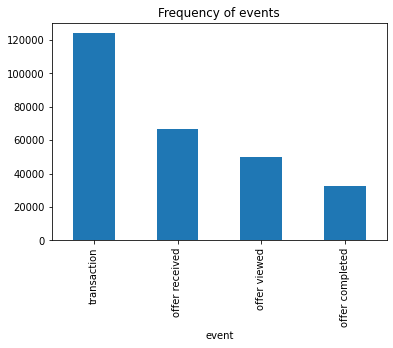

In [31]:
plt.xlabel('event')
plt.title('Frequency of events')
transcript_reduced['event'].value_counts().plot.bar()
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')
plt.show()

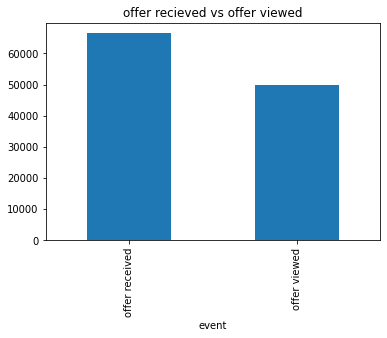

In [32]:
plt.xlabel('event')
plt.title('offer recieved vs offer viewed')
transcript_reduced['event'].value_counts()[['offer received', 'offer viewed']].plot.bar()
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')
plt.show()

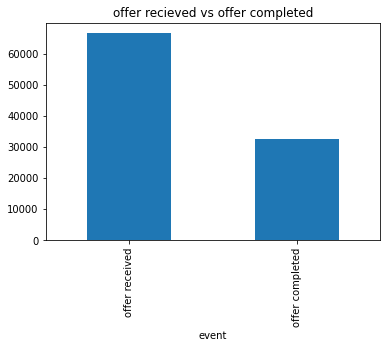

In [33]:
plt.xlabel('event')
plt.title('offer recieved vs offer completed')
transcript_reduced['event'].value_counts()[['offer received', 'offer completed']].plot.bar()
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')
plt.show()

With the previous visaulization, we can say that almost half of the offers gets completed.

In [34]:
def precentage_print(value):
  print('{:.2f}%'.format(value*100))

In the coming cell, I hot encode the event col and group the transcript
dataset by person id and offer id to get insights about the groups that do multiple events. This exploration only consider the offers, not the transactions.

In [35]:
transcript_offers_person = transcript_reduced.drop(['trans_amount'], axis =1)
OH_event_cols = pd.get_dummies(transcript_offers_person["event"])
# dropping time since it will be problematic when merging the datasets.
transcript_offers_person = transcript_offers_person.drop(['event', 'time'], axis=1)
transcript_offers_person = pd.concat([transcript_offers_person, OH_event_cols], axis=1).drop('transaction', axis = 1)
person_offer_grouped = transcript_offers_person.groupby(['person', 'offer_id']).agg(lambda col: max(col))

In [36]:
print("precentage of people that recieve the offer, view it and complete it:")
precentage_print(len(person_offer_grouped[(person_offer_grouped['offer viewed'] == 1) & 
                                           (person_offer_grouped['offer completed'] == 1) & 
                                           (person_offer_grouped['offer received'] == 1)])/len(person_offer_grouped))

precentage of people that recieve the offer, view it and complete it:
33.71%


In [37]:
print("precentage of people that recieve the offer but don't view it and still complete it:")
precentage_print(len(person_offer_grouped[(person_offer_grouped['offer viewed'] == 0) & 
                         (person_offer_grouped['offer completed'] == 1) & 
                         (person_offer_grouped['offer received'] == 1)])/len(person_offer_grouped))

precentage of people that recieve the offer but don't view it and still complete it:
6.37%


In [38]:
print("precentage of people that receive the offer, view it but don't complete it:")
precentage_print(len(person_offer_grouped[(person_offer_grouped['offer viewed'] == 1) & 
                         (person_offer_grouped['offer completed'] == 0) & 
                         (person_offer_grouped['offer received'] == 1)])/len(person_offer_grouped))

precentage of people that receive the offer, view it but don't complete it:
27.25%


In [39]:
#person_offer_status = pd.concat([transcript_offers_person, OH_event_cols], axis=1).drop(['person', 'transaction'], axis=1)
offers_grouped = transcript_offers_person.drop(['person'], axis=1).groupby(['offer_id']).agg(lambda col: sum(col))

In [40]:
# this function displays the rows with the maximume and minimum values 
#of a certain col
def print_max_min_in_col(df, col):
  print('max and min row with the column: '+ col)
  max_row = df[df[col] == max(df[col])].head(1)
  min_row = df[df[col] == min(df[col])].head(1)
  final_df = pd.concat([max_row, min_row]).set_index(pd.Index(['max', 'min']))
  display(final_df)

Here I am showing the values of the hot encoded cols of each offer in the portfolio.

In [41]:
offers_portfolio = pd.merge(offers_grouped, portfolio, left_on="offer_id", right_on="id").sort_values(
    by=['offer completed'], ascending=False)
offers_portfolio.head(10)

,offer completed,offer received,offer viewed,reward,channels,difficulty,duration,offer_type,id
9,5003,6652,6407,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
1,4886,6655,6379,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,4188,6685,3499,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
8,4103,6576,6310,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
2,3911,6631,3460,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5
7,3657,6683,5901,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
0,3386,6726,2215,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
4,3310,6593,6329,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
3,0,6657,3487,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
5,0,6643,5873,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837


Here is a table with the rows that has the max and min values of the cols: *offer completed*, *offer received* and *offer viewed*. The tables are indexed with the string: max and min for visaulization purposes.

In [42]:
print_max_min_in_col(offers_portfolio, 'offer completed')
print_max_min_in_col(offers_portfolio, 'offer received')
print_max_min_in_col(offers_portfolio, 'offer viewed')

max and min row with the column: offer completed


,offer completed,offer received,offer viewed,reward,channels,difficulty,duration,offer_type,id
max,5003,6652,6407,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
min,0,6657,3487,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed


max and min row with the column: offer received


,offer completed,offer received,offer viewed,reward,channels,difficulty,duration,offer_type,id
max,3386,6726,2215,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
min,4103,6576,6310,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d


max and min row with the column: offer viewed


,offer completed,offer received,offer viewed,reward,channels,difficulty,duration,offer_type,id
max,5003,6652,6407,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
min,3386,6726,2215,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In the following two cells, I aggregate the already grouped person-offers dataset to get the total number of offer events made per profile.

In [43]:
person_total_offers = person_offer_grouped.groupby(by=['person']).agg(lambda col: sum(col))

In [44]:
person_total_offer_events_profiles = pd.merge(person_total_offers, profile_reduced, left_on="person", right_on="id")
person_total_offer_events_profiles

,offer completed,offer received,offer viewed,gender,age,id,became_member_on,income
0,3,5,4,M,33,0009655768c64bdeb2e877511632db8f,20170421,72000.0
1,3,5,5,O,40,0011e0d4e6b944f998e987f904e8c1e5,20180109,57000.0
2,2,4,3,F,59,0020c2b971eb4e9188eac86d93036a77,20160304,90000.0
3,3,4,4,F,24,0020ccbbb6d84e358d3414a3ff76cffd,20161111,60000.0
4,2,4,3,F,26,003d66b6608740288d6cc97a6903f4f0,20170621,73000.0
...,...,...,...,...,...,...,...,...
14820,3,4,3,F,69,fff3ba4757bd42088c044ca26d73817a,20150920,83000.0
14821,2,4,3,M,71,fff7576017104bcc8677a8d63322b5e1,20171031,73000.0
14822,0,3,2,M,71,fff8957ea8b240a6b5e634b6ee8eafcf,20180218,56000.0
14823,2,3,3,M,34,fffad4f4828548d1b5583907f2e9906b,20170123,34000.0


In the following cell, I parse the date to be able to use it as a numerical value. </br>
The new col will calculate the time in days since the customer registered up untill now.

In [45]:
# this function will be also used later for feature engineering
def date_to_days_since_reg(df, col_name):
  df[col_name] = pd.to_datetime(df[col_name], format = '%Y%m%d')
  df['days_since_reg'] = (pd.to_datetime('today') - df[col_name]).dt.days
  df = df.drop([col_name], axis =1)
  return df

In [46]:
# transform became_member_on to days_since_reg feature.
offers_profiles_days_since_reg = date_to_days_since_reg(person_total_offer_events_profiles, 'became_member_on')
offers_profiles_days_since_reg

,offer completed,offer received,offer viewed,gender,age,id,income,days_since_reg
0,3,5,4,M,33,0009655768c64bdeb2e877511632db8f,72000.0,1292
1,3,5,5,O,40,0011e0d4e6b944f998e987f904e8c1e5,57000.0,1029
2,2,4,3,F,59,0020c2b971eb4e9188eac86d93036a77,90000.0,1705
3,3,4,4,F,24,0020ccbbb6d84e358d3414a3ff76cffd,60000.0,1453
4,2,4,3,F,26,003d66b6608740288d6cc97a6903f4f0,73000.0,1231
...,...,...,...,...,...,...,...,...
14820,3,4,3,F,69,fff3ba4757bd42088c044ca26d73817a,83000.0,1871
14821,2,4,3,M,71,fff7576017104bcc8677a8d63322b5e1,73000.0,1099
14822,0,3,2,M,71,fff8957ea8b240a6b5e634b6ee8eafcf,56000.0,989
14823,2,3,3,M,34,fffad4f4828548d1b5583907f2e9906b,34000.0,1380


average days since registration: 1143.9300471185213
median days since registration: 1049.0


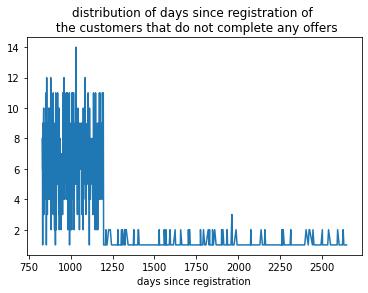

In [47]:
#gettings the distribution of the days since reg. the customers that view the offers but don't complete it.
days_reg_not_completed_offers = offers_profiles_days_since_reg[(offers_profiles_days_since_reg['offer viewed'] >= 1) & 
                         (offers_profiles_days_since_reg['offer completed'] == 0) &
                         (offers_profiles_days_since_reg['offer received'] >= 1)]["days_since_reg"]
plt.title('distribution of days since registration of \n the customers that do not complete any offers')
plt.xlabel('days since registration')
days_reg_not_completed_offers.value_counts().sort_index().plot.line()
print("average days since registration: {}".format(days_reg_not_completed_offers.mean()))
print("median days since registration: {}".format(days_reg_not_completed_offers.median()))
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')

average days since registration: 1402.6694476889704
median days since registration: 1300.0


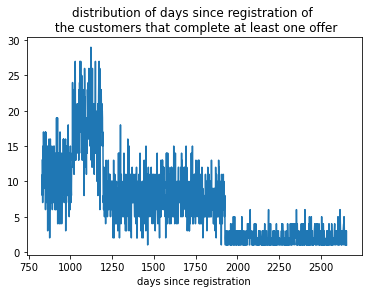

In [48]:
#gettings the distribution of the days since reg. of the the customers that complete the offers.
days_reg_completed_offers = offers_profiles_days_since_reg[
                                                              (offers_profiles_days_since_reg['offer completed'] >= 1)
                                                              ]["days_since_reg"]
days_reg_completed_offers.value_counts().sort_index().plot.line()
plt.title('distribution of days since registration of \n the customers that complete at least one offer')
plt.xlabel('days since registration')
print("average days since registration: {}".format(days_reg_completed_offers.mean()))
print("median days since registration: {}".format(days_reg_completed_offers.median()))
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')

average income: 67835.39128983814
median income: 67000.0


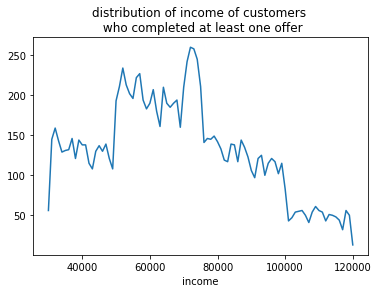

In [49]:
#gettings the distribution of the days incom of the the customers that complete the offers.
days_reg_complted_offers = offers_profiles_days_since_reg[
                                                              (offers_profiles_days_since_reg['offer completed'] >= 1)
                                                              ]["income"]
days_reg_complted_offers.value_counts().sort_index().plot.line()
plt.xlabel('income')
plt.title('distribution of income of customers \n who completed at least one offer')
print("average income: {}".format(days_reg_complted_offers.mean()))
print("median income: {}".format(days_reg_complted_offers.median()))
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')

average income: 55145.34251540413
median income: 53000.0


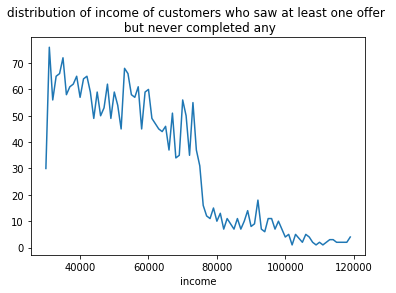

In [50]:
#gettings the distribution of the income of the the customers that view the offers but don't complete it.
income_not_complted_offers = person_total_offer_events_profiles[(person_total_offer_events_profiles['offer viewed'] >= 1) & 
                         (person_total_offer_events_profiles['offer completed'] == 0) & 
                         (person_total_offer_events_profiles['offer received'] >= 1)]["income"]
income_not_complted_offers.value_counts().sort_index().plot.line()
plt.xlabel('income')
plt.title('distribution of income of customers who saw at least one offer \n but never completed any')
print("average income: {}".format(income_not_complted_offers.mean()))
print("median income: {}".format(income_not_complted_offers.median()))
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')

average age: 55.23660937760721
median age: 56.0


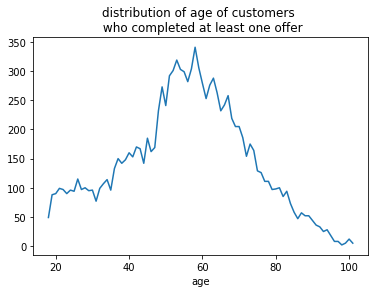

In [51]:
#gettings the distribution of the age of the the customers that complete the offers.
days_reg_complted_offers = offers_profiles_days_since_reg[
                                                              (offers_profiles_days_since_reg['offer completed'] >= 1)
                                                              ]["age"]
days_reg_complted_offers.value_counts().sort_index().plot.line()
plt.xlabel('age')
plt.title('distribution of age of customers \n who completed at least one offer')
print("average age: {}".format(days_reg_complted_offers.mean()))
print("median age: {}".format(days_reg_complted_offers.median()))
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')

average age: 50.77600579920261
median age: 51.0


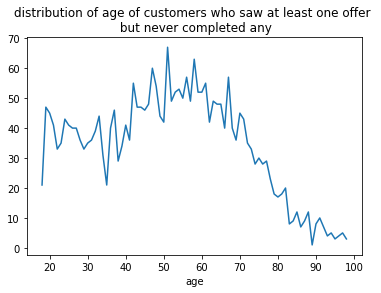

In [52]:
#gettings the distribution of the age of the customers that view the offers but don't complete it.
age_not_completed_offers = person_total_offer_events_profiles[(person_total_offer_events_profiles['offer viewed'] >= 1) & 
                         (person_total_offer_events_profiles['offer completed'] == 0) & 
                         (person_total_offer_events_profiles['offer received'] >= 1)]["age"]
age_not_completed_offers.value_counts().sort_index().plot.line()
plt.xlabel('age')
plt.title('distribution of age of customers who saw at least one offer \n but never completed any')
print("average age: {}".format(age_not_completed_offers.mean()))
print("median age: {}".format(age_not_completed_offers.median()))
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')

In [53]:
# merging the grouped data of person and offer with profile to get further insights.
person_offer_grouped_profile = pd.merge (person_offer_grouped, profile, left_on="person", right_on="id", how="left").drop(
    ["id"], axis =1).set_index(person_offer_grouped.index)
data_merged = pd.merge(person_offer_grouped_profile, portfolio, left_on="offer_id", right_on="id").drop(['id'], axis =1)

18


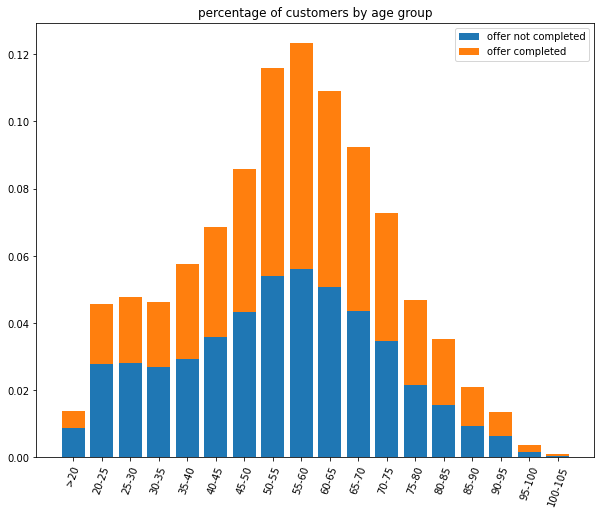

In [54]:
# dvide the age into groups
age_groups = data_merged["age"] // 5
num_people = data_merged.shape[0]
# get the total number of customers per age group
offer_not_completed_group = age_groups[data_merged["offer completed"]==0].value_counts()
offer_completed_group = age_groups[data_merged["offer completed"]==1].value_counts()
# sort the index values
inds = np.sort(offer_not_completed_group.index.values)
plt.figure(figsize=(10, 8))
# create bar plots for each value
age_groups_offer_not_completed_bar = plt.bar(inds, offer_not_completed_group[inds].values / num_people)
age_groups_offer_completed_bar = plt.bar(inds, offer_completed_group[inds].values / num_people,
                                  bottom=offer_not_completed_group[inds].values / num_people)
plt.title('percentage of customers by age group')
# create ticks for the bar plots
# of the index is less than 3 then let the tick be (>20) since only values less than 3 exist there
# otherwise, just create ticks in the form x1-x2
age_groups_ticks = ['{}-{}'.format(int(i * 5), int((i + 1)* 5)) if i > 3 else '>20' for i in inds[0:]]
plt.xticks(inds, age_groups_ticks, rotation = 70)
print(len(age_groups_ticks))
plt.legend((age_groups_offer_not_completed_bar[0], age_groups_offer_completed_bar[0]), ('offer not completed', 'offer completed'))
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')
plt.show()

Using the previous visaulizations, we can say ofor sure that customers that stay longer on average complete more offers. This finding could be helpful when offering offers to older customers or only offer diffcult offers when the customer has been a user for a long time.
Also, customers between 55 and 60 are more likely to complete the offers. However, younger customers tend to view the offers but never complete it.

In [55]:
# this function will be used later for feature engineering.
def hot_encode(df, col_name):
  OH_cols = pd.get_dummies(df[col_name])
  df = pd.concat([df, OH_cols], axis = 1).drop([col_name], axis =1)
  return df

In [56]:
transcript_profile = pd.merge(transcript_reduced, profile_reduced, left_on = "person", right_on = "id")

In [57]:
#One-Hot encoding the gender feature to use it for visaulization.
transcript_profile_genders_encoded = hot_encode(transcript_profile, "gender")
transcript_profile_genders_encoded

,person,event,time,offer_id,trans_amount,age,id,became_member_on,income,F,M,O
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,1,0,0
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,1,0,0
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,,19.89,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,1,0,0
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,1,0,0
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,,17.78,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
272757,9fcbff4f8d7241faa4ab8a9d19c8a812,offer viewed,504,3f207df678b143eea3cee63160fa8bed,NaN,47,9fcbff4f8d7241faa4ab8a9d19c8a812,20171013,94000.0,0,1,0
272758,9fcbff4f8d7241faa4ab8a9d19c8a812,offer received,576,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,47,9fcbff4f8d7241faa4ab8a9d19c8a812,20171013,94000.0,0,1,0
272759,9fcbff4f8d7241faa4ab8a9d19c8a812,offer viewed,576,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,47,9fcbff4f8d7241faa4ab8a9d19c8a812,20171013,94000.0,0,1,0
272760,3045af4e98794a04a5542d3eac939b1f,offer received,576,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,58,3045af4e98794a04a5542d3eac939b1f,20161020,78000.0,1,0,0


In [58]:
#renaming the columns for visaulization.
transcript_profile_genders_encoded_grouped_by_event = transcript_profile_genders_encoded.groupby(by=['event']).agg(lambda col: sum(col))[["F", "M", "O"]]
transcript_profile_genders_encoded_grouped_by_event.columns = ["Female", "Male", "Other"]
transcript_profile_genders_encoded_grouped_by_event

,Female,Male,Other
event,,,
offer completed,15477,16466,501
offer received,27456,38129,916
offer viewed,20786,28301,773
transaction,49382,72794,1781


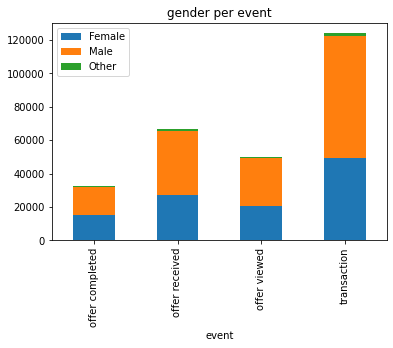

In [59]:
transcript_profile_genders_encoded_grouped_by_event.plot.bar(stacked=True)
plt.title('gender per event')
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')
plt.show()

The upcoming cells show insights about the offer types.

In [60]:
#merge the portfolio dataset with transcript and profile to get further gender insights.
transcript_profile_genders_encoded_portfolio = pd.merge(
    transcript_profile_genders_encoded.drop(["id"], axis =1), 
    portfolio, left_on="offer_id", right_on="id").drop("id", axis =1)

In [61]:
transcript_profile_genders_encoded_portfolio_completed_offers = transcript_profile_genders_encoded_portfolio[                                                                                                
transcript_profile_genders_encoded_portfolio['event'] == 'offer completed']

In [62]:
transcript_profile_genders_encoded_portfolio_grouped_by_offer_type = transcript_profile_genders_encoded_portfolio_completed_offers.groupby(
by=['offer_type'])

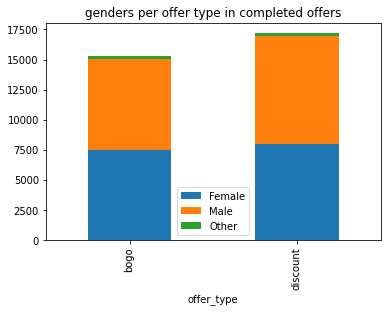

In [63]:
# group the  data by offer type.
offer_type_genders = transcript_profile_genders_encoded_portfolio_grouped_by_offer_type.agg(lambda col: sum(col))[['F', 'M', 'O']]
offer_type_genders.columns = ["Female", "Male", "Other"]
offer_type_genders.plot.bar(stacked=True)
plt.title('genders per offer type in completed offers')
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')
plt.show()

In [64]:
transcript_profile_genders_encoded_portfolio_age_offer_type = transcript_profile_genders_encoded_portfolio_completed_offers[["age", "offer_type"]]

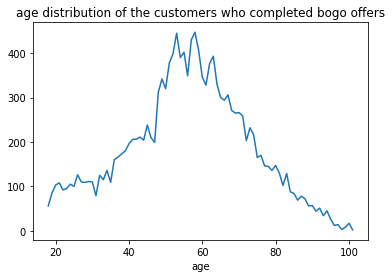

In [65]:
plt.xlabel('age')
plt.title('age distribution of the customers who completed bogo offers')
transcript_profile_genders_encoded_portfolio_age_offer_type[
transcript_profile_genders_encoded_portfolio_age_offer_type["offer_type"] == "bogo"]["age"].value_counts().sort_index().plot.line()
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')

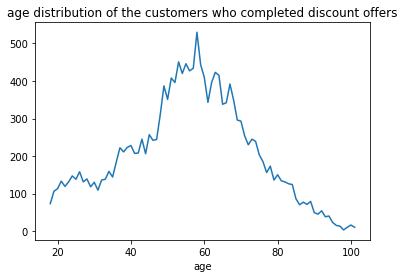

In [66]:
plt.xlabel('age')
plt.title('age distribution of the customers who completed discount offers')
transcript_profile_genders_encoded_portfolio_age_offer_type_discount = transcript_profile_genders_encoded_portfolio_completed_offers[
transcript_profile_genders_encoded_portfolio_completed_offers["offer_type"] == "discount"]["age"].value_counts().sort_index().plot.line()
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')

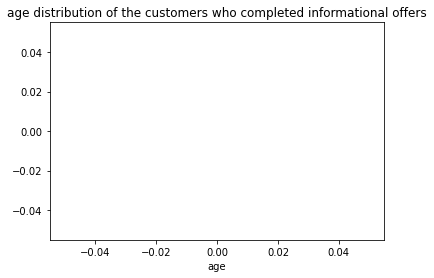

In [67]:
plt.xlabel('age')
plt.title('age distribution of the customers who completed informational offers')
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')
transcript_profile_genders_encoded_portfolio_completed_offers[
transcript_profile_genders_encoded_portfolio_completed_offers["offer_type"] == "informational"]["age"].value_counts().sort_index().plot.line()
plt.show()

The upcoming plot shows how income relates to reward.

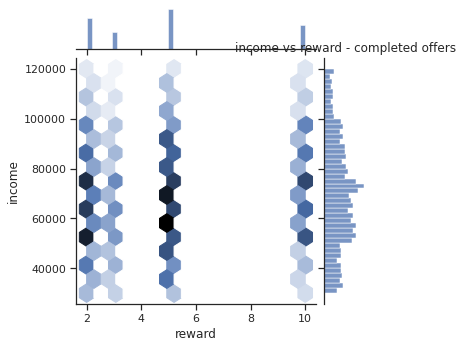

In [68]:
sns.set_theme(style="ticks")
sns.jointplot(data=transcript_profile_genders_encoded_portfolio_completed_offers[["reward", "income"]], 
              x='reward', y='income', 
              kind='hex', height=5, gridsize = 15)
plt.title('income vs reward - completed offers')
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')
plt.show()

The upcoming plot shows how age relates to reward.

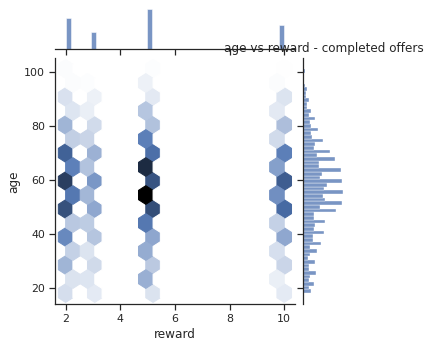

In [69]:
sns.jointplot(data=transcript_profile_genders_encoded_portfolio_completed_offers[["reward", "age"]], 
              x='reward', y='age', 
              kind='hex', height=5, gridsize=15)
plt.title('age vs reward - completed offers')
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')
plt.show()

The upcoming plot shows how age relates to difficulty.

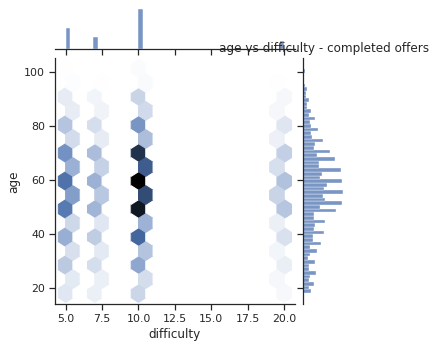

In [70]:
sns.jointplot(data=transcript_profile_genders_encoded_portfolio_completed_offers[["difficulty", "age"]], 
              x='difficulty', y='age', 
              kind='hex', height=5, gridsize=15)
plt.title('age vs difficulty - completed offers')
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')
plt.show()

The upcoming plot shows how income relates to difficulty.

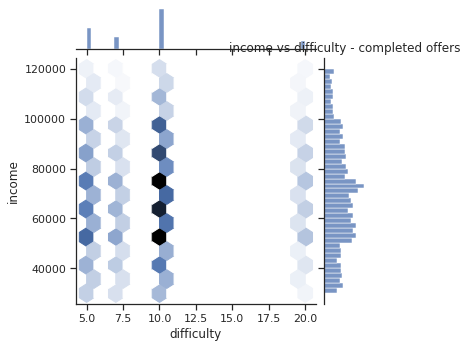

In [71]:
sns.set_theme(style="ticks")
sns.jointplot(data=transcript_profile_genders_encoded_portfolio_completed_offers[["difficulty", "income"]], 
              x='difficulty', y='income', 
              kind='hex', height=5, gridsize=15)
plt.title('income vs difficulty - completed offers')
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')
plt.show()

The most active groups are the ones with age 60 and income between 55k and 75k. This group is usually interested in offers with difficulty level of 10 and reward level of 5.

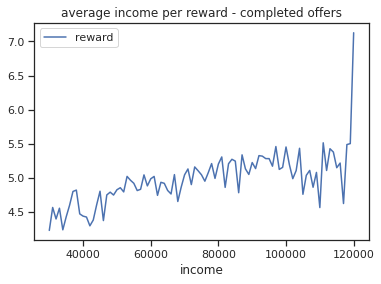

In [72]:
transcript_profile_genders_encoded_portfolio_completed_offers[["reward", "income"]].groupby("income").agg(np.average).plot.line()
plt.title('average income per reward - completed offers')
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')
plt.show()

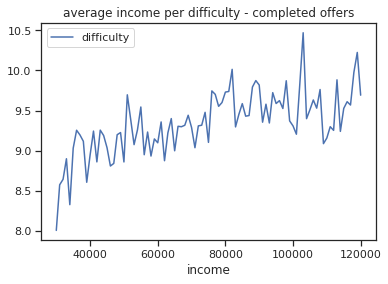

In [73]:
transcript_profile_genders_encoded_portfolio_completed_offers[["difficulty", "income"]].groupby("income").agg(np.average).plot.line()
plt.title('average income per difficulty - completed offers')
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')
plt.show()

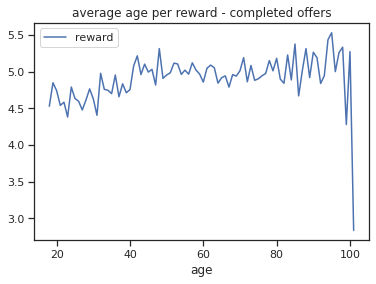

In [74]:
transcript_profile_genders_encoded_portfolio_completed_offers[["age", "reward"]].groupby("age").agg(np.average).plot.line()
plt.title('average age per reward - completed offers')
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')
plt.show()

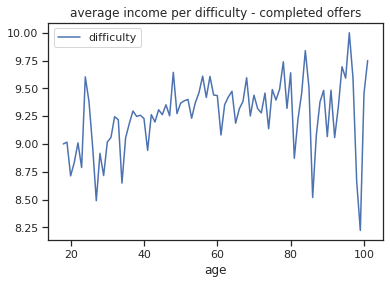

In [75]:
transcript_profile_genders_encoded_portfolio_completed_offers[["age", "difficulty"]].groupby("age").agg(np.average).plot.line()
plt.title('average income per difficulty - completed offers')
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')
plt.show()

The previous visaulizations shows a positive correlation between the average age, income, difficulty and reward. In other words, On average, age and income increases with the difficulty and reward levels of the offers (older customers and the ones that earn high incomes are more likely to be able to complete difficult offers and get higher rewards). 

The coming cells show insights about different channel mediums.

In [76]:
# getting all the unique values of the channels feature.
chnls_set = set([chnl for chnl_row in portfolio['channels'] for chnl in chnl_row])
chnls_set

{'email', 'mobile', 'social', 'web'}

In [77]:
# this function one-hot encode the channels feature.
def create_channels_cols(df, chnls_set):
  return_df = df.copy()
  for chnl in chnls_set:
    return_df[chnl] = return_df['channels'].apply(lambda row: 1 if chnl in row else 0)
  return_df = return_df.drop('channels', axis =1)
  return return_df

In [78]:
completed_offers_profiles_portfolio_encoded_channels = create_channels_cols(
    transcript_profile_genders_encoded_portfolio_completed_offers, chnls_set)

In [79]:
completed_offers_profiles_portfolio_encoded_channels.head(5)

,person,event,time,offer_id,trans_amount,age,became_member_on,income,F,M,O,reward,difficulty,duration,offer_type,mobile,social,web,email
2,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75,20170509,100000.0,1,0,0,5,5,7,bogo,1,0,1,1
5,e2127556f4f64592b11af22de27a7932,offer completed,522,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,68,20180426,70000.0,0,1,0,5,5,7,bogo,1,0,1,1
10,389bc3fa690240e798340f5a15918d5c,offer completed,498,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,65,20180209,53000.0,0,1,0,5,5,7,bogo,1,0,1,1
19,868317b9be554cb18e50bc68484749a2,offer completed,468,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,96,20171117,89000.0,1,0,0,5,5,7,bogo,1,0,1,1
21,f082d80f0aac47a99173ba8ef8fc1909,offer completed,12,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,40,20160709,33000.0,0,1,0,5,5,7,bogo,1,0,1,1


In [80]:
# creating seprate dataframes for different channel mediums to use it later for visualization. 
completed_offers_profiles_portfolio_social = completed_offers_profiles_portfolio_encoded_channels[
                                                     completed_offers_profiles_portfolio_encoded_channels["social"] == 1]
completed_offers_profiles_portfolio_web = completed_offers_profiles_portfolio_encoded_channels[
                                                     completed_offers_profiles_portfolio_encoded_channels["web"] == 1]
completed_offers_profiles_portfolio_email = completed_offers_profiles_portfolio_encoded_channels[
                                                     completed_offers_profiles_portfolio_encoded_channels["email"] == 1]
completed_offers_profiles_portfolio_mobile = completed_offers_profiles_portfolio_encoded_channels[
                                                     completed_offers_profiles_portfolio_encoded_channels["mobile"] == 1]

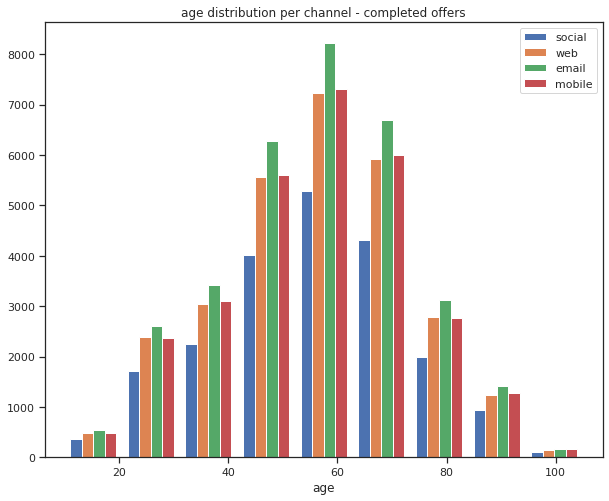

In [81]:
# comparing age between different channel mediums. 
plt.figure(figsize=[10,8])
bins = np.linspace(10, 105, 10)
plt.hist([completed_offers_profiles_portfolio_social["age"], completed_offers_profiles_portfolio_web["age"]
          , completed_offers_profiles_portfolio_email["age"], completed_offers_profiles_portfolio_mobile["age"]], 
         bins, label=['social', 'web', 'email', 'mobile'])
plt.legend(loc='upper right')
plt.title('age distribution per channel - completed offers')
plt.xlabel('age')
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')
plt.show()

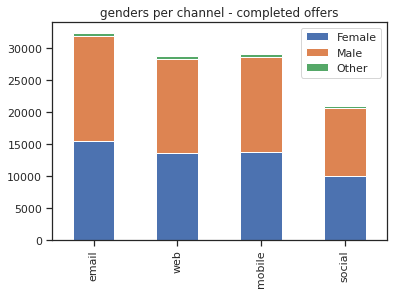

In [82]:
# aggregating age to get insights about gender in every channel medium.
completed_offers_profiles_portfolio_email_genders = completed_offers_profiles_portfolio_email[['F', 'M', 'O']].agg(lambda col: sum(col))
completed_offers_profiles_portfolio_web_genders = completed_offers_profiles_portfolio_web[['F', 'M', 'O']].agg(lambda col: sum(col))
completed_offers_profiles_portfolio_mobile_genders = completed_offers_profiles_portfolio_mobile[['F', 'M', 'O']].agg(lambda col: sum(col))
completed_offers_profiles_portfolio_social_genders = completed_offers_profiles_portfolio_social[['F', 'M', 'O']].agg(lambda col: sum(col))

full_channels_genders_df = pd.DataFrame([completed_offers_profiles_portfolio_email_genders, completed_offers_profiles_portfolio_web_genders,
        completed_offers_profiles_portfolio_mobile_genders, completed_offers_profiles_portfolio_social_genders])
full_channels_genders_df.index = ['email', 'web', 'mobile', 'social']
full_channels_genders_df.columns = ["Female", "Male", "Other"]

full_channels_genders_df.plot.bar(stacked=True)
plt.title('genders per channel - completed offers')
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')
plt.show()

In [83]:
# merging the date to further investigate the features.
# remove all the id features since they are useless to the classifcation process.
person_offer_grouped_profile = pd.merge (person_offer_grouped, profile, left_on="person", right_on="id", how="left").drop(
    ["id"], axis =1).set_index(person_offer_grouped.index)
data_merged = pd.merge(person_offer_grouped_profile, portfolio, left_on="offer_id", right_on="id").drop(['id'], axis =1)
data_merged_X = data_merged.drop(["offer completed", "offer received"], axis =1)
data_merged_y = data_merged["offer completed"]

In [84]:
data_merged

,offer completed,offer received,offer viewed,gender,age,became_member_on,income,reward,channels,difficulty,duration,offer_type
0,1,1,0,M,33,20170421,72000.0,2,"[web, email, mobile]",10,7,discount
1,0,1,0,F,19,20160809,65000.0,2,"[web, email, mobile]",10,7,discount
2,0,1,0,M,56,20171209,47000.0,2,"[web, email, mobile]",10,7,discount
3,1,1,1,F,58,20171207,119000.0,2,"[web, email, mobile]",10,7,discount
4,1,1,1,M,26,20141221,61000.0,2,"[web, email, mobile]",10,7,discount
...,...,...,...,...,...,...,...,...,...,...,...,...
55217,1,1,1,M,40,20170216,32000.0,10,"[email, mobile, social]",10,7,bogo
55218,1,1,1,F,67,20170219,77000.0,10,"[email, mobile, social]",10,7,bogo
55219,0,1,1,M,20,20180315,44000.0,10,"[email, mobile, social]",10,7,bogo
55220,1,1,1,F,59,20170831,93000.0,10,"[email, mobile, social]",10,7,bogo


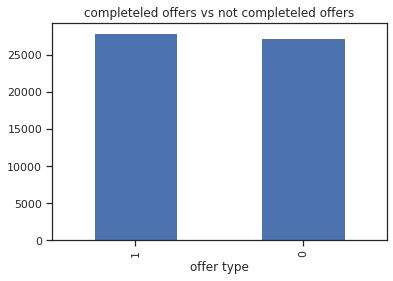

In [85]:
data_merged_y.value_counts().plot.bar()
plt.title('completeled offers vs not completeled offers')
plt.xlabel('offer type')
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')
plt.show()

offer completed has almost balanced class label ratio.

The upcoming cells include transformers to be able to transform teh features in the data engineering step without repeating the code.

In [86]:
from sklearn.base import TransformerMixin, BaseEstimator
class ChannelsTransformer(TransformerMixin, BaseEstimator):
    """
    Transforms the channels attribute from a list
    to one-hot encoded features.
    """      
    def fit(self, x, y=None):
      return self
    def transform(self, x, y=None):
      email_x = np.array([ 1 if 'email' in chnls else 0 for chnls in x])
      web_x = np.array([ 1 if 'web' in chnls else 0 for chnls in x])
      social_x = np.array([ 1 if 'social' in chnls else 0 for chnls in x])
      mobile_x = np.array([ 1 if 'mobile' in chnls else 0 for chnls in x])
      return_X = np.c_[email_x, web_x, social_x, mobile_x]
      return np.c_[email_x, web_x, social_x, mobile_x]
        
    def get_feature_names(self):
      return np.array(['email', 'web', 'social', 'media'])

In [87]:
from sklearn.base import TransformerMixin, BaseEstimator
class DateTransformer(TransformerMixin, BaseEstimator):
    """
    Transforms the became_member_on feature 
    from a date-like integer to an integer value
    of the numbers of days since registeration.
    """    
    def fit(self, x, y=None):
      return self
    def transform(self, x, y=None):
      x_as_date = pd.to_datetime(x, format = '%Y%m%d')
      days_since_reg = (pd.to_datetime('today') - x_as_date).dt.days
      return np.c_[days_since_reg]
        
    def get_feature_names(self):
      return np.array(['days_since_reg'])

In [88]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# this col. transformer applies all the 
# previous transformers and in addition
# one-hot encode the gender and offer_type features
ct1 = ColumnTransformer(
     transformers = [
                     ("ohe", OneHotEncoder(), ["gender", "offer_type"]),
                     ("chnlt", ChannelsTransformer(), "channels"),
                     ("datet", DateTransformer(), "became_member_on")
                     ],
     remainder = 'passthrough')
data_merged_X_transformed = ct1.fit_transform(data_merged_X)

In [89]:
def get_col_names(column_transformer):
  """
  return a list of all cols after transformation.
  """
  rest_cols =  ["offer viewed", "age", "income", "reward"
              ,"difficulty", "duration"]
  transformed_cols = np.array([])
  for name,step in ct1.named_transformers_.items():
      if hasattr(step, 'get_feature_names'):
          transformed_cols = np.append(transformed_cols, step.get_feature_names())
  return np.append(transformed_cols, rest_cols)

In the upcoming cells, I will be investigating how correlated the feature are, and how each feature could affect the classification process.

In [90]:
data_merged_X_df = pd.DataFrame(data_merged_X_transformed, columns = get_col_names(ct1))

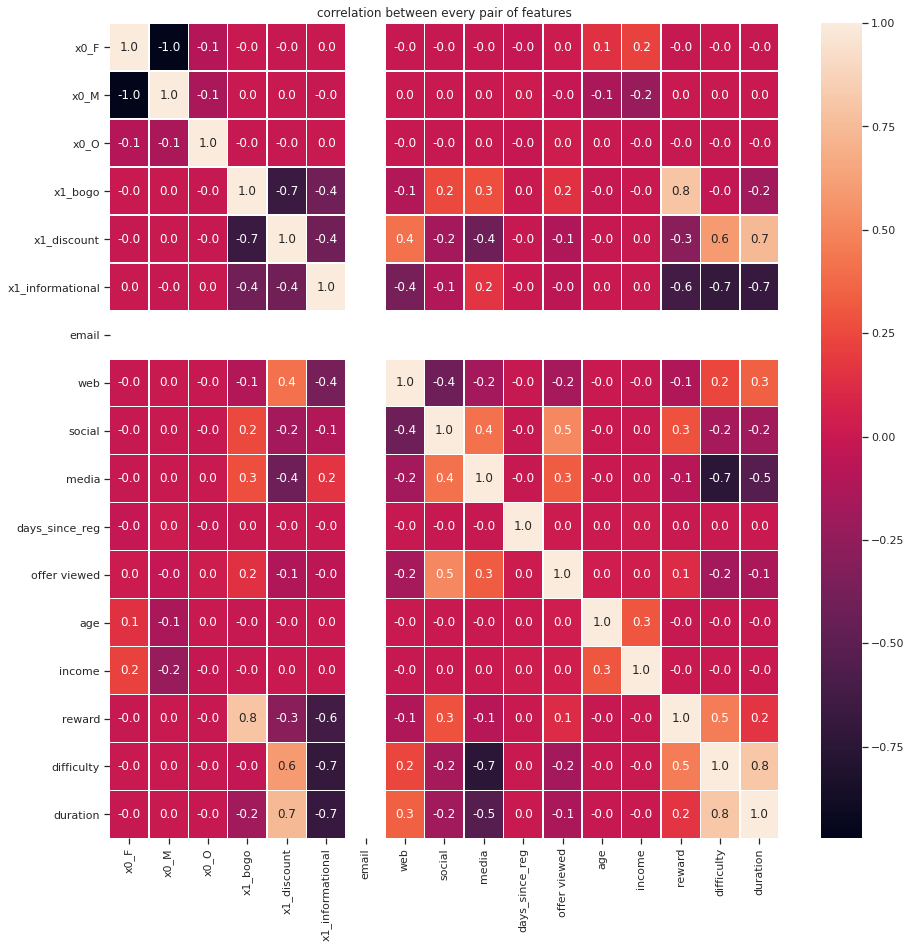

In [91]:
# get corr. matrix.
plt.figure(figsize=(15,15))
sns.heatmap(data_merged_X_df.corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.title('correlation between every pair of features')
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')
plt.show()

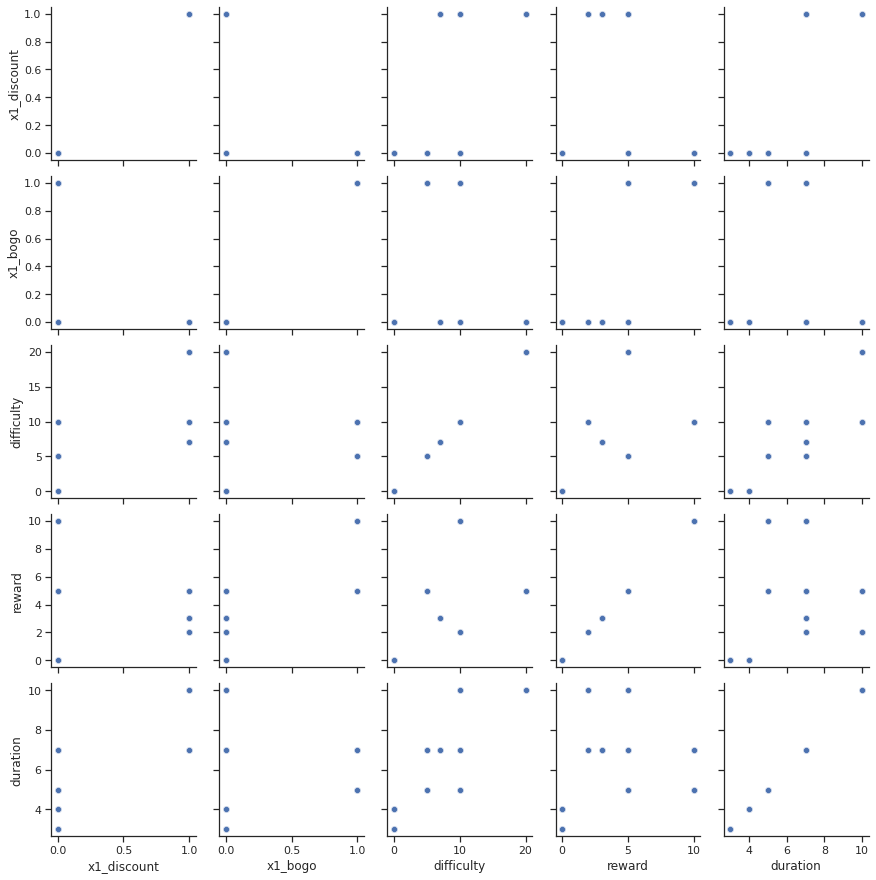

In [92]:
# show the correlation between the most correlated features.
df = data_merged_X_df[['x1_discount', 'x1_bogo', 'difficulty','reward', 'duration']]
g = sns.PairGrid(df, diag_sharey=False)
plt.savefig(str(plt.gca().get_title())+'.png', bbox_inches='tight')
g.map(sns.scatterplot)

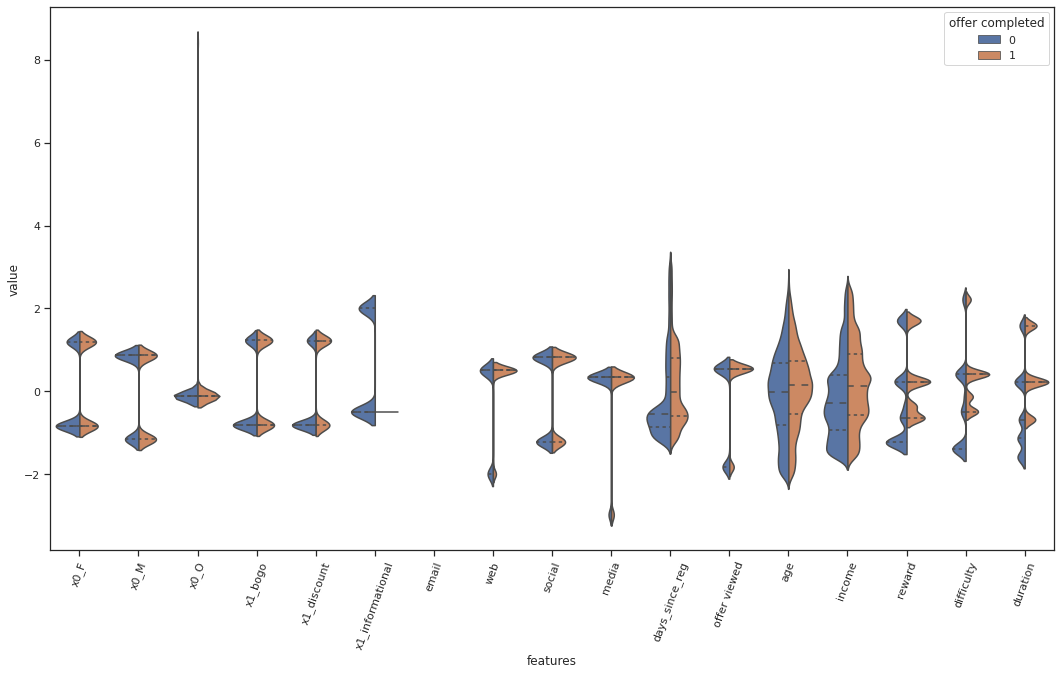

In [106]:
# first ten features
# standardization is done to be able to compare between the features in a similar scale
# this code was inspired by https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization
data = data_merged_X_df
data_ss = (data - data.mean()) / (data.std()) # standardization
data = pd.concat([data_merged_y, data_ss],axis=1)
data = pd.melt(data,id_vars="offer completed", var_name="features", value_name='value')
plt.figure(figsize=(18,10))
sns.violinplot(x="features", y="value", hue="offer completed", data=data,split=True, inner="quart")
plt.xticks(rotation=70)
plt.savefig(str("features vs classes")+'.png', bbox_inches='tight')
plt.show()

from the previous cell, we can derive that no feature is able to completely seprate the datat. Therfore, choosing a right model will be hard. 

# Feature Engineering

Secondaly, I will merge all the data with each other to form one datset which clould be used for prediction.

In [94]:
# this pipeline will be used later to transform data.
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline1 = Pipeline(
    [
        ('preprocessing', ct1),
        ('ss', StandardScaler())
    ]
)

In [95]:
# data_merged is the result of merging all the datsets together as mentioned before
# in the data vis. section
y = data_merged["offer completed"]
X = data_merged.drop(["offer completed", "offer received"], axis =1)
X_transformed = pipeline1.fit_transform(X)

In [96]:
# splitting the data from validation, training and testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)
X_train_transformed = pipeline1.fit_transform(X_train)
X_test_transformed = pipeline1.transform(X_test)

# Model Selection and tuning

Since it is not clear if the positive and negative classes are equally important or not, I treated them as equally important. Therefore, I used f1 score to evaluate the model.

In [97]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

models = [GradientBoostingClassifier(), LogisticRegression(solver='lbfgs'), SGDClassifier(), GaussianNB(), 
           KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(n_estimators=100)]

for model in models:
    results = cross_val_predict(model, X_train_transformed, y_train, cv=5)
    print(model.__class__, f1_score(y_train, results))

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> 0.8058417780805587
<class 'sklearn.linear_model._logistic.LogisticRegression'> 0.7907738218593277
<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'> 0.784902833839624
<class 'sklearn.naive_bayes.GaussianNB'> 0.7754457781169778
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> 0.7728131720138148
<class 'sklearn.tree._classes.DecisionTreeClassifier'> 0.7422819395137734
<class 'sklearn.ensemble._forest.RandomForestClassifier'> 0.7836885602435841


In [98]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [99]:
params = {'learning_rate':[i/10 for i in range(3, 6)], 'n_estimators':np.arange(128, 132, 1),
         'min_samples_split':np.arange(2, 3), 'min_samples_leaf':np.arange(6, 8),
          'max_depth':np.arange(1, 3), 'max_features':np.arange(1, 8)}

random_search_gbc = RandomizedSearchCV(GradientBoostingClassifier(), params, cv=5, scoring='neg_mean_squared_error', random_state = 42)
random_search_gbc.fit(X_train_transformed, y_train)
print(random_search_gbc.best_params_)
gbc_model = GradientBoostingClassifier(**random_search_gbc.best_params_)
gbc_score = cross_val_predict(gbc_model, X_train_transformed, y_train, cv=5)
f1_score(y_train, gbc_score)

{'n_estimators': 128, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 7, 'max_depth': 2, 'learning_rate': 0.3}


0.803612122761059

In [100]:
params = {'loss':["hinge", "log", "modified_huber", "perceptron", "squared_hinge"]}

grid_search_sgd = GridSearchCV(SGDClassifier(random_state=42), 
                                     params, cv=5, scoring='neg_mean_squared_error')
grid_search_sgd.fit(X_train_transformed, y_train)
print(grid_search_sgd.best_params_)
sgd_model = SGDClassifier(random_state=42,**grid_search_sgd.best_params_)
sgd_score = cross_val_predict(sgd_model, X_train_transformed, y_train, cv=5)
f1_score(y_train, sgd_score)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


{'loss': 'log'}


0.7842440706300282

In [101]:
params = {'C':[0.001,0.01,0.1,1,10,100]}

grid_search_lgrc = GridSearchCV(LogisticRegression(random_state=42), 
                                     params, cv=5, scoring='neg_mean_squared_error')
grid_search_lgrc.fit(X_train_transformed, y_train)
print(grid_search_lgrc.best_params_)
lgrc_model = LogisticRegression(random_state=42,**grid_search_lgrc.best_params_)
lgrc_score = cross_val_predict(lgrc_model, X_train_transformed, y_train, cv=5)
f1_score(y_train, lgrc_score)

{'C': 1}


0.7907738218593277

In [102]:
params = {'n_estimators':np.arange(50, 1000, 100), 'max_depth':np.arange(3, 8)}

random_search_rfc = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
                                     params, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search_rfc.fit(X_train_transformed, y_train)
print(random_search_rfc.best_params_)
rfc_model = RandomForestClassifier(random_state=42,**random_search_rfc.best_params_)
rfc_score = cross_val_predict(rfc_model, X_train_transformed, y_train, cv=5)
f1_score(y_train, rfc_score)

{'n_estimators': 850, 'max_depth': 7}


0.8091711763030476

In [103]:
params = {'priors': [None], 'var_smoothing': [0.00000001, 0.000000001, 0.00000001]}

random_search_gnb = RandomizedSearchCV(GaussianNB(), 
                                     params, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search_gnb.fit(X_train_transformed, y_train)
print(random_search_gnb.best_params_)
gnb_model = GaussianNB(**random_search_gnb.best_params_)
gnb_score = cross_val_predict(gnb_model, X_train_transformed, y_train, cv=5)
f1_score(y_train, gnb_score)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'var_smoothing': 1e-08, 'priors': None}


0.7754457781169778

from the previous cell we can conclude that the random forest classifier has the least f1 score and therfore it will be chosen as our final classifier.

In [104]:
final_rfc = RandomForestClassifier(random_state=42,**random_search_rfc.best_params_)
final_rfc.fit(X_train_transformed, y_train)
pred_y = final_rfc.predict(X_test_transformed)
f1_score(y_test, pred_y)

0.8085140691768121